In [1]:
import pandas as pd
import requests
import re

In [2]:
def parse_date(date_str):
    formats = ['%Y-%m-%d', '%Y-%m', '%Y']
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    
    return pd.NaT

In [3]:
raw_data = pd.read_csv('../resources/scholarly.csv')
columns_of_interest = {
    'Reporting date 1': 'string',
    'Scholarly & creative work type': 'string',
    'DOI': 'string',
    'Proprietary ID': 'string',
    'Authors OR Patent owners OR Presenters': 'string',
    'URL OR Author URL': 'string',
    'Funding': 'string',
    'Published proceedings OR Journal': 'string',
    'Conference name OR Presented at OR Meeting or conference': 'string',
    'Status': 'string',
    'Publisher': 'string',
    'Publication date OR Date awarded OR Presentation date': 'string',
    'Title OR Chapter title': 'string',
    'Sub types': 'string',
    'Canonical journal title': 'string',
    'Abstract OR Description': 'string'
}
data = raw_data[columns_of_interest.keys()]
data = data.astype(columns_of_interest)
data['Reporting date 1'] = pd.to_datetime(data['Reporting date 1'], format = '%d/%m/%Y')
data['Publication date OR Date awarded OR Presentation date'] = data['Publication date OR Date awarded OR Presentation date'].apply(parse_date)
data.head()

,Reporting date 1,Scholarly & creative work type,DOI,Proprietary ID,Authors OR Patent owners OR Presenters,URL OR Author URL,Funding,Published proceedings OR Journal,Conference name OR Presented at OR Meeting or conference,Status,Publisher,Publication date OR Date awarded OR Presentation date,Title OR Chapter title,Sub types,Canonical journal title,Abstract OR Description
0,2012-08-01,Scholarly article,10.1109/TPWRS.2012.2183007,WOS:000309996500040,"Paschalidis IC, Li B, Caramanis MC",http://gateway.webofknowledge.com/gateway/Gate...,"NSF, NSF, DOE, ARO, ODDR&E MURI10 program",IEEE TRANSACTIONS ON POWER SYSTEMS,<NA>,Published,IEEE-INST ELECTRICAL ELECTRONICS ENGINEERS INC,2012-08-01,Demand-Side Management for Regulation Service ...,"Article, Journal",IEEE Transactions on Power Systems,<NA>
1,2012-12-01,Scholarly article,10.1109/tmc.2011.214,10.1109/TMC.2011.214,"Li K, Guo D, Lin Y, Paschalidis IC",<NA>,<NA>,IEEE Transactions on Mobile Computing,<NA>,Published,Institute of Electrical and Electronics Engine...,2012-12-01,Position and Movement Detection of Wireless Se...,<NA>,IEEE Transactions on Mobile Computing,<NA>
2,2012-01-01,Scholarly article,<NA>,2CC8EA0E-5D44-4C73-90A8-B996799539CB,"Ding X-C, Wang J, Lahijanian M, Paschalidis IC...",<NA>,<NA>,Proceedings of IEEE International Conference o...,<NA>,<NA>,<NA>,NaT,Temporal Logic Motion Control using Actor-Crit...,inproceedings,IEEE International Conference on Robotics and ...,<NA>
3,2013-06-01,Scholarly article,10.1109/tnet.2012.2216897,10.1109/TNET.2012.2216897,"Moazzez-Estanjini R, Wang J, Paschalidis IC",<NA>,<NA>,IEEE/ACM Transactions on Networking,<NA>,Published,Institute of Electrical and Electronics Engine...,2013-06-01,Scheduling Mobile Nodes for Cooperative Data T...,<NA>,IEEE ACM Transactions on Networking,<NA>
4,2012-08-01,Scholarly article,10.1155/2012/523787,10.1155/2012/523787,"Paschalidis IC, Wu R",<NA>,<NA>,International Journal of Distributed Sensor Ne...,<NA>,Published,SAGE Publications,2012-08-01,Robust Maximum Lifetime Routing and Energy All...,<NA>,International Journal of Distributed Sensor Ne...,<jats:p> We consider the maximum lifetime rout...


In [4]:
# find how many rows with DOI
doi_num = data['DOI'].notnull().sum()
# find how many proprietary id are "WOS: *"
wos_num = data['Proprietary ID'].apply(lambda x: re.match(r'^WOS:.*', x) is not None).sum()
# find how many proprietary id are "*/*/*"
slash_num = data['Proprietary ID'].apply(lambda x: re.match(r'^.*\/.*\/.*', x) is not None).sum()
# find how many proprietary id are "*-*-*-*-*"
uuid_num = data['Proprietary ID'].apply(lambda x: re.match(r'^.*-.*-.*-.*-.*', x) is not None).sum()
# find how many proprietary id are "*.*"
dot_num = data['Proprietary ID'].apply(lambda x: re.match(r'^.*\..*', x) is not None).sum()

print(f"DOI: {doi_num}")
print(f"WOS: {wos_num}")
print(f"Slash: {slash_num}")
print(f"UUID: {uuid_num}")
print(f"Dot: {dot_num}")

DOI: 146
WOS: 36
Slash: 8
UUID: 311
Dot: 45


In [5]:
# if DOI is missing, find it's Proprietary ID
# print in for loop
def find_missing_DOI(df):
    missing_DOI = df[df['DOI'].isnull()]
    return missing_DOI['Proprietary ID']

# print the id in for loop
for i in find_missing_DOI(data):
    print(i)

2CC8EA0E-5D44-4C73-90A8-B996799539CB
66EB658F-193C-4ABA-9FD0-EA3BF3156A9F
2446B710-2BA5-47AA-8044-29CE8CD6F8EE
61A44718-A576-4CFD-B029-885195A7DA69
2565F290-E7C8-4EC4-B87E-64D7AF517FBD
A8708F68-D2CC-440D-91B0-E9615ABB9816
E8C52EB2-99A2-46F4-A28B-F942664F8FAD
002AD626-B0B4-4B50-BAB5-B0A023B50B9E
7A3DBF94-B7E5-49DB-8AF1-F5DF18BAF642
WOS:000352223501101
7B193390-8901-41E9-8959-23F498CE3A9F
8493DA7F-540D-4EC9-B1A0-B0E0CE142618
01CA362E-5C5E-46D0-BF0B-C61F0A385E74
C01112E1-246F-47DE-AEAF-3B7A984F84E2
D3DE6C62-DA17-401C-A5D6-9B654EDA01E7
4493FCF3-6936-471F-AE5E-3AE560196C9F
1A1AF0EF-5DD4-4792-94F4-68D2FB0D63AE
17215CEA-6D4E-466D-81D1-2322FEC55BDC
A0741E4A-1184-4C19-8AC5-AC5B04DA2044
E7BA3B0D-498E-4585-AC0A-1E50FDC8871C
B34A85C1-3D60-4FD1-8616-535ADEA29DC6
6500912A-E467-4A55-AF0B-1B01B3720355
8D2B3545-E8D2-4BEA-A10B-D89C9A44A108
EC95D2E0-2AC0-4CD0-8792-0FCA2FA600DB
BFFE9BCA-C783-4119-9C44-42A90F0E1589
WOS:000303506200004
WOS:000184745100020
C0C22C0D-4F4B-4263-8546-BB8C0457289B
journals/corr/W

# Add Abstract to Scholarly

In [13]:
# Filter dataframe to add abstracts
# df = df[df['Reporting date 1'].dt.year >= year]
filtered_data = data[data['Reporting date 1'].dt.year >= 2021]
# print original length
print(f"Original length: {len(filtered_data)}")
# remove duplicated rows with same title
filtered_data = filtered_data.drop_duplicates(subset='Title OR Chapter title')
# print new length
print(f"New length: {len(filtered_data)}")
filtered_data.head()

Original length: 115
New length: 104


,Reporting date 1,Scholarly & creative work type,DOI,Proprietary ID,Authors OR Patent owners OR Presenters,URL OR Author URL,Funding,Published proceedings OR Journal,Conference name OR Presented at OR Meeting or conference,Status,Publisher,Publication date OR Date awarded OR Presentation date,Title OR Chapter title,Sub types,Canonical journal title,Abstract OR Description
296,2021-02-02,Conference paper (Published),<NA>,E9EFC2B1-92D9-4AAC-AA62-7CD5EB8928B9,"Queeney J, Paschalidis I, Cassandras C",https://ojs.aaai.org/index.php/AAAI/article/vi...,<NA>,<NA>,35th AAAI Conference on Artificial Intelligenc...,Published,<NA>,2021-02-02,Uncertainty-Aware Policy Optimization: A Robus...,<NA>,Proceedings of the ... AAAI Conference on Arti...,<NA>
297,2021-02-01,Conference paper (Published),10.23919/DATE51398.2021.9474075,A2F6A84C-1234-46B0-91C5-DA70FD3CB836,"Zhang Y, Wilson D, Paschalidis I, Coskun A",<NA>,<NA>,<NA>,"Design, Automation and Test in Europe Conferen...",Published,<NA>,2021-02-01,A Data Center Demand Response Policy for Real-...,<NA>,<NA>,<NA>
298,2021-04-13,Conference paper (Published),<NA>,F9A71EA7-1BB3-4229-9961-9CFF71C78311,"Zhang Z, Paschalidis I",http://proceedings.mlr.press/v130/zhang21b/zha...,<NA>,<NA>,24th International Conference on Artificial In...,Accepted,<NA>,2021-04-13,Provable Hierarchical Imitation Learning via EM,<NA>,<NA>,<NA>
304,2021-01-01,Scholarly article,10.1016/j.csbj.2021.04.028,33995918,"Sotudian S, Desta IT, Hashemi N, Zarbafian S, ...",https://www.ncbi.nlm.nih.gov/pubmed/33995918,"NIGMS NIH HHS, NIGMS NIH HHS, NIGMS NIH HHS",Comput Struct Biotechnol J,<NA>,Published online,<NA>,2021-01-01,Improved cluster ranking in protein-protein do...,Journal Article,Computational and Structural Biotechnology Jou...,We develop a Regression-based Ranking by Pairw...
305,2021-09-01,Conference paper (Published),10.1109/ITSC48978.2021.9564808,98F85C64-D7FA-4853-B173-97185B44CC51,"Wollenstein-Betech S, Paschalidis IC, Cassandr...",http://arxiv.org/abs/2107.06937v1,<NA>,<NA>,2021 IEEE International Intelligent Transporta...,Published,<NA>,2021-09-01,Planning Strategies for Lane Reversals in Tran...,<NA>,<NA>,This paper studies strategies to optimize the ...


In [14]:
IEEE = 'ieeexplore.ieee.org'
SPRINGER = 'link.springer.com'
NIH = 'nih.gov'
ARXIV = 'arxiv.org'

In [15]:
import time
import os
from bs4 import BeautifulSoup

original = []
crossref = []
semantic = []
scraping = []

semantic_scholar_url = 'https://api.semanticscholar.org/graph/v1/paper/search'

# print number of rows to be processed
print(f'Number of rows to be processed: {len(filtered_data)}')
for index, row in filtered_data.iterrows():
    title = row['Title OR Chapter title']
    abstract = None
    url = None
    has_doi = False

    # if abstract field is not empty and length > 100
    if not pd.isnull(row['Abstract OR Description']) and len(row['Abstract OR Description']) > 100:
        abstract = row['Abstract OR Description']
        original.append({'title': title, 'abstract': abstract})

    # if DOI is not empty
    if not abstract and not pd.isnull(row['DOI']):
        doi = row['DOI']
        title = f'\033[1m{title}\033[0m'
        has_doi = True


        # Try to get abstract from crossref
        crossref_url = f'http://api.crossref.org/works/{doi}'
        response = requests.get(crossref_url)
        url = response.json()['message']['URL']

        # try to get abstract, assign none if not found
        try:
            abstract = response.json()['message']['abstract']
            crossref.append({'title': title, 'abstract': abstract, 'url': url})
        except KeyError:
            pass
    else:
        url = row['URL OR Author URL']
    
    # Try to get abstract from semantic scholar
    if not abstract:
        headers = {'x-api-key': os.getenv('SEMANTIC_SCHOLAR_API_KEY')}
        params = {'query': title, 'fields': 'abstract', 'limit': 1}

        # sleep for 2 second to avoid rate limiting
        time.sleep(2)
        response = requests.get(semantic_scholar_url, headers=headers, params=params, timeout=10)
        try:
            abstract = response.json()['data'][0]['abstract']
            semantic.append({'title': title, 'abstract': abstract})
        except (IndexError, KeyError):
            pass
        except Exception as e:
            print(f'Failed to fetch data from Semantic Scholar')

    if abstract is None and url is not None:
        # if not found, try to get abstract through scraping
        try:
            response = requests.get(url, timeout=10)
            soup = BeautifulSoup(response.text, 'html.parser')
        
            # if the response is from ieee
            if IEEE in response.url:
                abstract = soup.find('div', class_='abstract-text').text
                scraping.append({'title': title, 'abstract': abstract, 'url': url})
            elif SPRINGER in response.url:
                abstract = soup.find(id='Abs1-content').text
                scraping.append({'title': title, 'abstract': abstract, 'url': url})
            elif NIH in response.url:
                abstract = soup.find('div', class_='abstract-content').text
                scraping.append({'title': title, 'abstract': abstract, 'url': url})
            elif ARXIV in response.url:
                abstract = soup.find('blockquote', class_='abstract').text
                scraping.append({'title': title, 'abstract': abstract, 'url': url})
        except Exception as e:
            print(f'Failed to scrape data from {url}')

    abstract_text = f'\033[92m{len(abstract)}\033[0m' if abstract is not None else f'\033[91m{abstract}\033[0m'
    print(f'{"[DOI]" if has_doi else ""}{title}: ({abstract_text})')

    # assign abstract value to filtered_data
    filtered_data.loc[index, 'Abstract OR Description'] = abstract

print(f'\nNumber of publications with abstract (Original): {len(original)}')
print(f'Number of publications with abstract (CrossRef): {len(crossref)}')
print(f'Number of publications with abstract (Semantic Scholar): {len(semantic)}')
print(f'Number of publications with abstract (Scraping): {len(scraping)}')

Number of rows to be processed: 104
Uncertainty-Aware Policy Optimization: A Robust, Adaptive Trust Region   Approach: (939)
[DOI]A Data Center Demand Response Policy for Real-World Workload Scenarios in  HPC: (1380)
Provable Hierarchical Imitation Learning via EM: (1025)
Improved cluster ranking in protein-protein docking using a regression approach.: (1178)
Planning Strategies for Lane Reversals in Transportation Networks: (1120)
An Artificial Intelligence-Assisted Method for Dementia Detection Using Images from the Clock Drawing Test.: (1402)
[DOI]An optimal transmission line switching and bus splitting heuristic incorporating AC and N-1 contingency constraints: (None)
The impact of payer status on hospital admissions: evidence from an academic medical center: (1629)
Generalized Proximal Policy Optimization with Sample Reuse: (943)
Detection of dementia on voice recordings using deep learning: a Framingham Heart Study: (2342)
[DOI]Routing and Rebalancing Intermodal Autonomous Mobili

In [16]:
# check how many rows have abstract
print(f'Number of rows with abstract: {filtered_data["Abstract OR Description"].notnull().sum()}')

Number of rows with abstract: 82


In [18]:
# change Reporting date 1 to %d/%m/%Y
filtered_data['Reporting date 1'] = filtered_data['Reporting date 1'].dt.strftime('%d/%m/%Y')
filtered_data.to_csv('../resources/scholarly_abstracts.csv', index=False)

# Testing

In [19]:
# match title only to correct data
def match_title(df, correct_df, print_head=False):
    merged_title = correct_df.merge(df, on='Title OR Chapter title', how='left')
    merged_title = merged_title[['Title OR Chapter title', 'Is part of FRP [Yes/No]?', 'Part of FRP']]
    merged_title = merged_title.rename(columns={'Is part of FRP [Yes/No]?': 'Actual', 'Part of FRP': 'Predicted'})
    merged_title['Actual'] = merged_title['Actual'].apply(lambda x: True if x == 'Y' else False)
    merged_title = merged_title.drop_duplicates(subset='Title OR Chapter title')

    if print_head:
        merged_title.head()

    return merged_title

# match title only to correct data
def match_abstract(df, correct_df, print_head=False):
    merge_abstract = correct_df.merge(df, on='Title OR Chapter title', how='left')
    merge_abstract = merge_abstract[['Title OR Chapter title', 'Is part of FRP [Yes/No]?', 'Part of FRP']]
    merge_abstract = merge_abstract.rename(columns={'Is part of FRP [Yes/No]?': 'Actual', 'Part of FRP': 'Predicted'})
    merge_abstract['Actual'] = merge_abstract['Actual'].apply(lambda x: True if x == 'Y' else False)
    merge_abstract = merge_abstract.drop_duplicates(subset='Title OR Chapter title')

    if print_head:
        merge_abstract.head()

    return merge_abstract

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# given one dataframe, plot confusion matrix
# true value is in 'Actual' column with True/False
# predicted value is in 'Predicted' column with True/False
def plot_confusion_matrix(df, title):
    temp_df = df.dropna(subset=['Predicted'])
    actual = temp_df['Actual'].astype(int)
    predicted = temp_df['Predicted'].astype(int)

    cm = confusion_matrix(actual, predicted)
    cm_df = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predicted False', 'Predicted True'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()


In [21]:
# give the the dataframe, calculate other scores
def calculate_scores(df):
    temp_df = df.dropna(subset=['Predicted'])
    actual = temp_df['Actual'].astype(int)
    predicted = temp_df['Predicted'].astype(int)

    tp = ((actual == 1) & (predicted == 1)).sum()
    tn = ((actual == 0) & (predicted == 0)).sum()
    fp = ((actual == 0) & (predicted == 1)).sum()
    fn = ((actual == 1) & (predicted == 0)).sum()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)

    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

## Testing with Llama2:13b

In [22]:
# read correct.xlsx
correct_data = pd.read_excel('../resources/correct.xlsx')
llama2_title = pd.read_csv('../resources/llama2-title.csv')
llama2_abstract = pd.read_csv('../resources/llama2-abstract.csv')

In [23]:
llama2_ttl_match = match_title(llama2_title, correct_data)
llama2_abs_match = match_abstract(llama2_abstract, correct_data)
calculate_scores(llama2_ttl_match)
print('-----------------')
calculate_scores(llama2_abs_match)

Accuracy: 0.5205479452054794
Precision: 0.4444444444444444
Recall: 0.8275862068965517
F1 Score: 0.5783132530120482
-----------------
Accuracy: 0.7333333333333333
Precision: 0.6136363636363636
Recall: 0.9
F1 Score: 0.7297297297297297


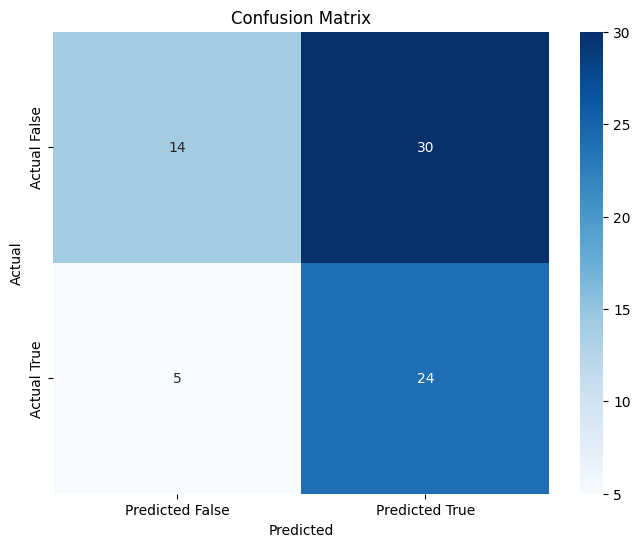

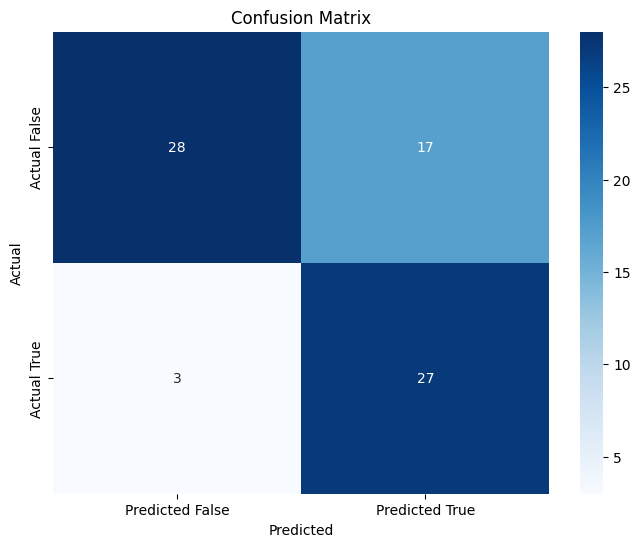

In [25]:
# print confusion matrix
plot_confusion_matrix(llama2_ttl_match, 'Title')
plot_confusion_matrix(llama2_abs_match, 'Abstract')

## Testing with Mistral:7b

In [26]:
mistral_title = pd.read_csv('../resources/mistral-title.csv')
mistral_abstract = pd.read_csv('../resources/mistral-abstract.csv')

In [27]:
mistral_title_match = match_title(mistral_title, correct_data)
mistral_abstract_match = match_abstract(mistral_abstract, correct_data)
calculate_scores(mistral_title_match)
print('-----------------')
calculate_scores(mistral_abstract_match)


Accuracy: 0.676056338028169
Precision: 0.8571428571428571
Recall: 0.21428571428571427
F1 Score: 0.34285714285714286
-----------------
Accuracy: 0.7397260273972602
Precision: 0.8571428571428571
Recall: 0.41379310344827586
F1 Score: 0.5581395348837208


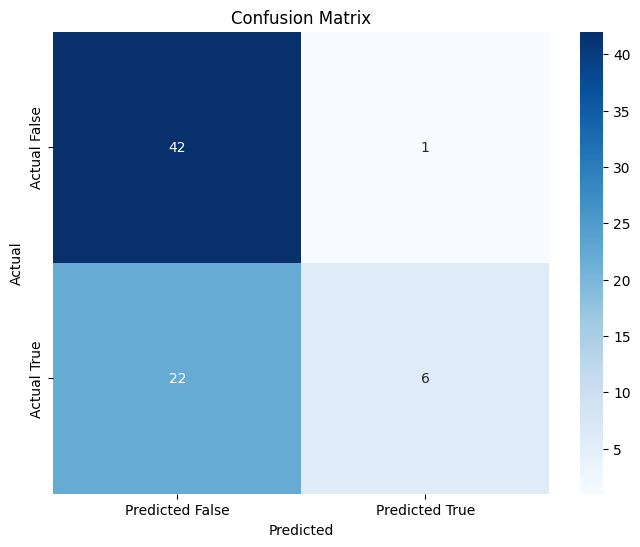

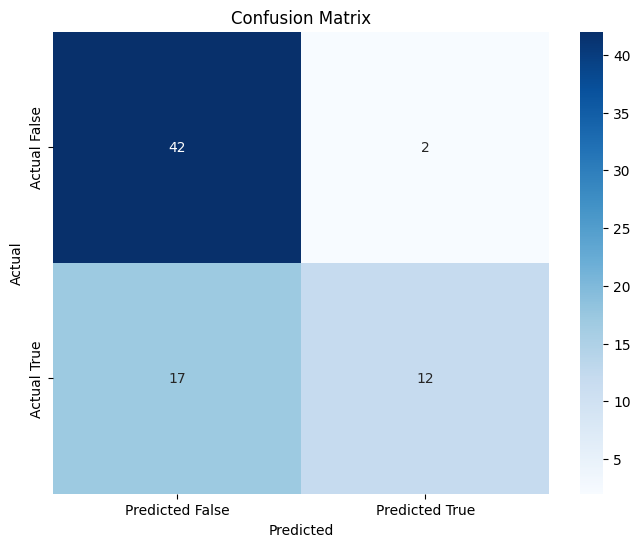

In [28]:
plot_confusion_matrix(mistral_title_match, 'Title')
plot_confusion_matrix(mistral_abstract_match, 'Abstract')